In [1]:
from glob import glob
import os
import pandas as pd
from tqdm import tqdm_notebook as tqdm
import re


In [2]:
en_path = 'GAMEDATA/GenshinData/Readable/EN'
ja_path = 'GAMEDATA/GenshinData/Readable/JP'
zh_path = 'GAMEDATA/GenshinData/Readable/CHS'

skip_count = 0
en_files, ja_files, zh_files = [], [], []
for zh_file in tqdm(os.listdir(zh_path), total=len(os.listdir(zh_path))):
    en_file = os.path.join(en_path, zh_file.split('.')[0] + '_EN.txt')
    ja_file = os.path.join(ja_path, zh_file.split('.')[0] + '_JP.txt')
    zh_file = os.path.join(zh_path, zh_file)
    if not os.path.exists(en_file) or not os.path.exists(ja_file):
        skip_count += 1
        continue
    en_files.append(en_file)
    ja_files.append(ja_file)
    zh_files.append(zh_file)

print(f'Skip {skip_count} files, {len(en_files)} files left.')

/tmp/ipykernel_5513/1966767859.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for zh_file in tqdm(os.listdir(zh_path), total=len(os.listdir(zh_path))):


  0%|          | 0/1025 [00:00<?, ?it/s]

Skip 0 files, 1025 files left.


In [3]:
df = pd.DataFrame(columns=['en', 'ja', 'zh'])

skip_count = 0
for en_file, ja_file, zh_file in tqdm(zip(en_files, ja_files, zh_files), total=len(en_files)):
    en_text, ja_text, zh_text = [], [], []
    for line in open(en_file, 'r', encoding='utf-8'):
        line = line.strip()
        if line == '':
            continue
        en_text.append(line)
    for line in open(ja_file, 'r', encoding='utf-8'):
        line = line.strip()
        if line == '':
            continue
        ja_text.append(line)
    for line in open(zh_file, 'r', encoding='utf-8'):
        line = line.strip()
        if line == '':
            continue
        zh_text.append(line)

    if len(en_text) != len(ja_text) or len(en_text) != len(zh_text):
        skip_count += 1
        continue
    df = pd.concat([df, pd.DataFrame({'en': en_text, 'ja': ja_text, 'zh': zh_text})], ignore_index=True)

print(f'Skip {skip_count} files')
df

/tmp/ipykernel_5513/3100780392.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for en_file, ja_file, zh_file in tqdm(zip(en_files, ja_files, zh_files), total=len(en_files)):


  0%|          | 0/1025 [00:00<?, ?it/s]

Skip 4 files


,en,ja,zh
0,The long-wandering eccentric no longer thinks ...,長年放浪してきた傾奇者は、もうそのことを思い出さないだろう。,流浪多年的倾奇者已不会再想起它，
1,"But when he closes his eyes, he can still see ...",しかし目を閉じると、たたら砂の月夜や炉火が見える。,但闭上双眼，却仍能看到踏鞴砂的月夜与炉火。
2,The kind young deputy said:,若く、心優しい副官が言った。,年轻仁厚的副官说：
3,"""This gold ornament is a proof of identity gra...",「この金の飾りは、将軍から授かった身分の証である。」,「这金饰是将军大人所赐身份之证，」
4,"""But as you travel the world, please bear this...",「世を渡り歩く時、やむを得ない場合を除き、」,「但你行走世间时，若非万不得已，」
...,...,...,...
12642,"Sangonomiya was once an ocean abyss, until the...",珊瑚宮は、最初は海溝だった。大蛇が渡来した際、渦が巻き上がった珊瑚が島になった。故に珊瑚宮の...,珊瑚宫者，初为海渊，后有大蛇渡来，盘桓而升涡流，塑珊瑚而成岛。是故珊瑚宫人名之「海祇岛」，盖...
12643,The inhabitants of Watatsumi call themselves t...,海祇の人は海民と自称し、大蛇オロバシノミコトを祀る。海祇島に将軍奉行の位がなく、神宮を最高権...,海祇之人自称海民，奉大蛇远吕羽氏尊。海祇岛以神宫为高府，无将军奉行之畴。大小事务仰赖诸巫女，...
12644,"During the Archon War, Her Excellency the Almi...",往年魔神の混戦中、雷電大御所将軍様が稲妻全土を平定した。皆ひれ伏し、各々の地を治めた。事を起...,往年魔神混战，雷电大御所将军殿下定稻妻全土于一元，众皆震悚俯首，各安其位，或有直遭殄灭，再无...
12645,"The war was brutal, and brought great sufferin...",過酷な戦で民が苦しんだ。今のヤシオリ島で激しい戦闘が行われ、双方の被害が甚大だった。大御所殿...,战事酷烈，民生惨苦。两方鏖战今八酝岛，皆多有伤亡，大御所殿下之爱将天狗笹百合亦陨落其间。大蛇...


In [4]:
# drop duplicate
df = df.drop_duplicates(subset=['en', 'ja', 'zh'], keep='first')
df

,en,ja,zh
0,The long-wandering eccentric no longer thinks ...,長年放浪してきた傾奇者は、もうそのことを思い出さないだろう。,流浪多年的倾奇者已不会再想起它，
1,"But when he closes his eyes, he can still see ...",しかし目を閉じると、たたら砂の月夜や炉火が見える。,但闭上双眼，却仍能看到踏鞴砂的月夜与炉火。
2,The kind young deputy said:,若く、心優しい副官が言った。,年轻仁厚的副官说：
3,"""This gold ornament is a proof of identity gra...",「この金の飾りは、将軍から授かった身分の証である。」,「这金饰是将军大人所赐身份之证，」
4,"""But as you travel the world, please bear this...",「世を渡り歩く時、やむを得ない場合を除き、」,「但你行走世间时，若非万不得已，」
...,...,...,...
12642,"Sangonomiya was once an ocean abyss, until the...",珊瑚宮は、最初は海溝だった。大蛇が渡来した際、渦が巻き上がった珊瑚が島になった。故に珊瑚宮の...,珊瑚宫者，初为海渊，后有大蛇渡来，盘桓而升涡流，塑珊瑚而成岛。是故珊瑚宫人名之「海祇岛」，盖...
12643,The inhabitants of Watatsumi call themselves t...,海祇の人は海民と自称し、大蛇オロバシノミコトを祀る。海祇島に将軍奉行の位がなく、神宮を最高権...,海祇之人自称海民，奉大蛇远吕羽氏尊。海祇岛以神宫为高府，无将军奉行之畴。大小事务仰赖诸巫女，...
12644,"During the Archon War, Her Excellency the Almi...",往年魔神の混戦中、雷電大御所将軍様が稲妻全土を平定した。皆ひれ伏し、各々の地を治めた。事を起...,往年魔神混战，雷电大御所将军殿下定稻妻全土于一元，众皆震悚俯首，各安其位，或有直遭殄灭，再无...
12645,"The war was brutal, and brought great sufferin...",過酷な戦で民が苦しんだ。今のヤシオリ島で激しい戦闘が行われ、双方の被害が甚大だった。大御所殿...,战事酷烈，民生惨苦。两方鏖战今八酝岛，皆多有伤亡，大御所殿下之爱将天狗笹百合亦陨落其间。大蛇...


In [5]:
# remove html tag
df['en'] = df['en'].apply(lambda x: re.sub(r'<[^>]*?>', '', x))
df['ja'] = df['ja'].apply(lambda x: re.sub(r'<[^>]*?>', '', x))
df['zh'] = df['zh'].apply(lambda x: re.sub(r'<[^>]*?>', '', x))
df

/tmp/ipykernel_5513/1995334252.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['en'] = df['en'].apply(lambda x: re.sub(r'<[^>]*?>', '', x))
/tmp/ipykernel_5513/1995334252.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ja'] = df['ja'].apply(lambda x: re.sub(r'<[^>]*?>', '', x))
/tmp/ipykernel_5513/1995334252.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

,en,ja,zh
0,The long-wandering eccentric no longer thinks ...,長年放浪してきた傾奇者は、もうそのことを思い出さないだろう。,流浪多年的倾奇者已不会再想起它，
1,"But when he closes his eyes, he can still see ...",しかし目を閉じると、たたら砂の月夜や炉火が見える。,但闭上双眼，却仍能看到踏鞴砂的月夜与炉火。
2,The kind young deputy said:,若く、心優しい副官が言った。,年轻仁厚的副官说：
3,"""This gold ornament is a proof of identity gra...",「この金の飾りは、将軍から授かった身分の証である。」,「这金饰是将军大人所赐身份之证，」
4,"""But as you travel the world, please bear this...",「世を渡り歩く時、やむを得ない場合を除き、」,「但你行走世间时，若非万不得已，」
...,...,...,...
12642,"Sangonomiya was once an ocean abyss, until the...",珊瑚宮は、最初は海溝だった。大蛇が渡来した際、渦が巻き上がった珊瑚が島になった。故に珊瑚宮の...,珊瑚宫者，初为海渊，后有大蛇渡来，盘桓而升涡流，塑珊瑚而成岛。是故珊瑚宫人名之「海祇岛」，盖...
12643,The inhabitants of Watatsumi call themselves t...,海祇の人は海民と自称し、大蛇オロバシノミコトを祀る。海祇島に将軍奉行の位がなく、神宮を最高権...,海祇之人自称海民，奉大蛇远吕羽氏尊。海祇岛以神宫为高府，无将军奉行之畴。大小事务仰赖诸巫女，...
12644,"During the Archon War, Her Excellency the Almi...",往年魔神の混戦中、雷電大御所将軍様が稲妻全土を平定した。皆ひれ伏し、各々の地を治めた。事を起...,往年魔神混战，雷电大御所将军殿下定稻妻全土于一元，众皆震悚俯首，各安其位，或有直遭殄灭，再无...
12645,"The war was brutal, and brought great sufferin...",過酷な戦で民が苦しんだ。今のヤシオリ島で激しい戦闘が行われ、双方の被害が甚大だった。大御所殿...,战事酷烈，民生惨苦。两方鏖战今八酝岛，皆多有伤亡，大御所殿下之爱将天狗笹百合亦陨落其间。大蛇...


In [6]:
# remove row with only punctuation
df = df[~df['en'].str.match(r'^[^\w\s]+$')]
df = df[~df['ja'].str.match(r'^[^\w\s]+$')]
df = df[~df['zh'].str.match(r'^[^\w\s]+$')]
df

,en,ja,zh
0,The long-wandering eccentric no longer thinks ...,長年放浪してきた傾奇者は、もうそのことを思い出さないだろう。,流浪多年的倾奇者已不会再想起它，
1,"But when he closes his eyes, he can still see ...",しかし目を閉じると、たたら砂の月夜や炉火が見える。,但闭上双眼，却仍能看到踏鞴砂的月夜与炉火。
2,The kind young deputy said:,若く、心優しい副官が言った。,年轻仁厚的副官说：
3,"""This gold ornament is a proof of identity gra...",「この金の飾りは、将軍から授かった身分の証である。」,「这金饰是将军大人所赐身份之证，」
4,"""But as you travel the world, please bear this...",「世を渡り歩く時、やむを得ない場合を除き、」,「但你行走世间时，若非万不得已，」
...,...,...,...
12642,"Sangonomiya was once an ocean abyss, until the...",珊瑚宮は、最初は海溝だった。大蛇が渡来した際、渦が巻き上がった珊瑚が島になった。故に珊瑚宮の...,珊瑚宫者，初为海渊，后有大蛇渡来，盘桓而升涡流，塑珊瑚而成岛。是故珊瑚宫人名之「海祇岛」，盖...
12643,The inhabitants of Watatsumi call themselves t...,海祇の人は海民と自称し、大蛇オロバシノミコトを祀る。海祇島に将軍奉行の位がなく、神宮を最高権...,海祇之人自称海民，奉大蛇远吕羽氏尊。海祇岛以神宫为高府，无将军奉行之畴。大小事务仰赖诸巫女，...
12644,"During the Archon War, Her Excellency the Almi...",往年魔神の混戦中、雷電大御所将軍様が稲妻全土を平定した。皆ひれ伏し、各々の地を治めた。事を起...,往年魔神混战，雷电大御所将军殿下定稻妻全土于一元，众皆震悚俯首，各安其位，或有直遭殄灭，再无...
12645,"The war was brutal, and brought great sufferin...",過酷な戦で民が苦しんだ。今のヤシオリ島で激しい戦闘が行われ、双方の被害が甚大だった。大御所殿...,战事酷烈，民生惨苦。两方鏖战今八酝岛，皆多有伤亡，大御所殿下之爱将天狗笹百合亦陨落其间。大蛇...


In [7]:
# remove lines with only numbers
df = df[~df['en'].str.match(r'^\d+$')]
df = df[~df['ja'].str.match(r'^\d+$')]
df = df[~df['zh'].str.match(r'^\d+$')]
df

,en,ja,zh
0,The long-wandering eccentric no longer thinks ...,長年放浪してきた傾奇者は、もうそのことを思い出さないだろう。,流浪多年的倾奇者已不会再想起它，
1,"But when he closes his eyes, he can still see ...",しかし目を閉じると、たたら砂の月夜や炉火が見える。,但闭上双眼，却仍能看到踏鞴砂的月夜与炉火。
2,The kind young deputy said:,若く、心優しい副官が言った。,年轻仁厚的副官说：
3,"""This gold ornament is a proof of identity gra...",「この金の飾りは、将軍から授かった身分の証である。」,「这金饰是将军大人所赐身份之证，」
4,"""But as you travel the world, please bear this...",「世を渡り歩く時、やむを得ない場合を除き、」,「但你行走世间时，若非万不得已，」
...,...,...,...
12642,"Sangonomiya was once an ocean abyss, until the...",珊瑚宮は、最初は海溝だった。大蛇が渡来した際、渦が巻き上がった珊瑚が島になった。故に珊瑚宮の...,珊瑚宫者，初为海渊，后有大蛇渡来，盘桓而升涡流，塑珊瑚而成岛。是故珊瑚宫人名之「海祇岛」，盖...
12643,The inhabitants of Watatsumi call themselves t...,海祇の人は海民と自称し、大蛇オロバシノミコトを祀る。海祇島に将軍奉行の位がなく、神宮を最高権...,海祇之人自称海民，奉大蛇远吕羽氏尊。海祇岛以神宫为高府，无将军奉行之畴。大小事务仰赖诸巫女，...
12644,"During the Archon War, Her Excellency the Almi...",往年魔神の混戦中、雷電大御所将軍様が稲妻全土を平定した。皆ひれ伏し、各々の地を治めた。事を起...,往年魔神混战，雷电大御所将军殿下定稻妻全土于一元，众皆震悚俯首，各安其位，或有直遭殄灭，再无...
12645,"The war was brutal, and brought great sufferin...",過酷な戦で民が苦しんだ。今のヤシオリ島で激しい戦闘が行われ、双方の被害が甚大だった。大御所殿...,战事酷烈，民生惨苦。两方鏖战今八酝岛，皆多有伤亡，大御所殿下之爱将天狗笹百合亦陨落其间。大蛇...


In [8]:
# remove lines that tokens is more than 256 or less than 1
from transformers import MT5TokenizerFast
tokenizer = MT5TokenizerFast.from_pretrained('google/mt5-small')

df['en_len'] = df['en'].apply(lambda x: len(tokenizer.tokenize(x)))
df['ja_len'] = df['ja'].apply(lambda x: len(tokenizer.tokenize(x)))
df['zh_len'] = df['zh'].apply(lambda x: len(tokenizer.tokenize(x)))
df

/home/toshihiko/anaconda3/envs/pytorch201/lib/python3.8/site-packages/transformers/convert_slow_tokenizer.py:454: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


,en,ja,zh,en_len,ja_len,zh_len
0,The long-wandering eccentric no longer thinks ...,長年放浪してきた傾奇者は、もうそのことを思い出さないだろう。,流浪多年的倾奇者已不会再想起它，,17,16,13
1,"But when he closes his eyes, he can still see ...",しかし目を閉じると、たたら砂の月夜や炉火が見える。,但闭上双眼，却仍能看到踏鞴砂的月夜与炉火。,31,16,21
2,The kind young deputy said:,若く、心優しい副官が言った。,年轻仁厚的副官说：,7,11,8
3,"""This gold ornament is a proof of identity gra...",「この金の飾りは、将軍から授かった身分の証である。」,「这金饰是将军大人所赐身份之证，」,22,16,14
4,"""But as you travel the world, please bear this...",「世を渡り歩く時、やむを得ない場合を除き、」,「但你行走世间时，若非万不得已，」,14,15,16
...,...,...,...,...,...,...
12642,"Sangonomiya was once an ocean abyss, until the...",珊瑚宮は、最初は海溝だった。大蛇が渡来した際、渦が巻き上がった珊瑚が島になった。故に珊瑚宮の...,珊瑚宫者，初为海渊，后有大蛇渡来，盘桓而升涡流，塑珊瑚而成岛。是故珊瑚宫人名之「海祇岛」，盖...,79,54,54
12643,The inhabitants of Watatsumi call themselves t...,海祇の人は海民と自称し、大蛇オロバシノミコトを祀る。海祇島に将軍奉行の位がなく、神宮を最高権...,海祇之人自称海民，奉大蛇远吕羽氏尊。海祇岛以神宫为高府，无将军奉行之畴。大小事务仰赖诸巫女，...,107,68,65
12644,"During the Archon War, Her Excellency the Almi...",往年魔神の混戦中、雷電大御所将軍様が稲妻全土を平定した。皆ひれ伏し、各々の地を治めた。事を起...,往年魔神混战，雷电大御所将军殿下定稻妻全土于一元，众皆震悚俯首，各安其位，或有直遭殄灭，再无...,149,91,87
12645,"The war was brutal, and brought great sufferin...",過酷な戦で民が苦しんだ。今のヤシオリ島で激しい戦闘が行われ、双方の被害が甚大だった。大御所殿...,战事酷烈，民生惨苦。两方鏖战今八酝岛，皆多有伤亡，大御所殿下之爱将天狗笹百合亦陨落其间。大蛇...,102,62,61


In [9]:
df = df[df['en_len'] <= 256]
df = df[df['ja_len'] <= 256]
df = df[df['zh_len'] <= 256]
df = df[df['en_len'] >= 1]
df = df[df['ja_len'] >= 1]
df = df[df['zh_len'] >= 1]
df

,en,ja,zh,en_len,ja_len,zh_len
0,The long-wandering eccentric no longer thinks ...,長年放浪してきた傾奇者は、もうそのことを思い出さないだろう。,流浪多年的倾奇者已不会再想起它，,17,16,13
1,"But when he closes his eyes, he can still see ...",しかし目を閉じると、たたら砂の月夜や炉火が見える。,但闭上双眼，却仍能看到踏鞴砂的月夜与炉火。,31,16,21
2,The kind young deputy said:,若く、心優しい副官が言った。,年轻仁厚的副官说：,7,11,8
3,"""This gold ornament is a proof of identity gra...",「この金の飾りは、将軍から授かった身分の証である。」,「这金饰是将军大人所赐身份之证，」,22,16,14
4,"""But as you travel the world, please bear this...",「世を渡り歩く時、やむを得ない場合を除き、」,「但你行走世间时，若非万不得已，」,14,15,16
...,...,...,...,...,...,...
12642,"Sangonomiya was once an ocean abyss, until the...",珊瑚宮は、最初は海溝だった。大蛇が渡来した際、渦が巻き上がった珊瑚が島になった。故に珊瑚宮の...,珊瑚宫者，初为海渊，后有大蛇渡来，盘桓而升涡流，塑珊瑚而成岛。是故珊瑚宫人名之「海祇岛」，盖...,79,54,54
12643,The inhabitants of Watatsumi call themselves t...,海祇の人は海民と自称し、大蛇オロバシノミコトを祀る。海祇島に将軍奉行の位がなく、神宮を最高権...,海祇之人自称海民，奉大蛇远吕羽氏尊。海祇岛以神宫为高府，无将军奉行之畴。大小事务仰赖诸巫女，...,107,68,65
12644,"During the Archon War, Her Excellency the Almi...",往年魔神の混戦中、雷電大御所将軍様が稲妻全土を平定した。皆ひれ伏し、各々の地を治めた。事を起...,往年魔神混战，雷电大御所将军殿下定稻妻全土于一元，众皆震悚俯首，各安其位，或有直遭殄灭，再无...,149,91,87
12645,"The war was brutal, and brought great sufferin...",過酷な戦で民が苦しんだ。今のヤシオリ島で激しい戦闘が行われ、双方の被害が甚大だった。大御所殿...,战事酷烈，民生惨苦。两方鏖战今八酝岛，皆多有伤亡，大御所殿下之爱将天狗笹百合亦陨落其间。大蛇...,102,62,61


In [10]:
# remove lines that LaBSE score is less than 0.6 or more than 0.99
import numpy as np
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('sentence-transformers/LaBSE').cuda()

_batch, _scores = [], []
_bs = 64
for i, row in tqdm(enumerate(df.itertuples()), total=df.shape[0]):
    inputs = [row.en, row.ja, row.zh]
    _batch.extend(inputs)
    if (i + 1) % _bs == 0 or i == df.shape[0] - 1:
        embeddings = model.encode(_batch)
        # calculate score between each pair
        for j in range(embeddings.shape[0] // 3):
            _scores.append(np.average([
                np.matmul(embeddings[j * 3], embeddings[j * 3 + 1].T),
                np.matmul(embeddings[j * 3], embeddings[j * 3 + 2].T),
                np.matmul(embeddings[j * 3 + 1], embeddings[j * 3 + 2].T)
            ]))
        _batch = []
df = df.assign(score=_scores)
df

/tmp/ipykernel_5513/3787246084.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i, row in tqdm(enumerate(df.itertuples()), total=df.shape[0]):


  0%|          | 0/11621 [00:00<?, ?it/s]

,en,ja,zh,en_len,ja_len,zh_len,score
0,The long-wandering eccentric no longer thinks ...,長年放浪してきた傾奇者は、もうそのことを思い出さないだろう。,流浪多年的倾奇者已不会再想起它，,17,16,13,0.757267
1,"But when he closes his eyes, he can still see ...",しかし目を閉じると、たたら砂の月夜や炉火が見える。,但闭上双眼，却仍能看到踏鞴砂的月夜与炉火。,31,16,21,0.778838
2,The kind young deputy said:,若く、心優しい副官が言った。,年轻仁厚的副官说：,7,11,8,0.814170
3,"""This gold ornament is a proof of identity gra...",「この金の飾りは、将軍から授かった身分の証である。」,「这金饰是将军大人所赐身份之证，」,22,16,14,0.819174
4,"""But as you travel the world, please bear this...",「世を渡り歩く時、やむを得ない場合を除き、」,「但你行走世间时，若非万不得已，」,14,15,16,0.709527
...,...,...,...,...,...,...,...
12642,"Sangonomiya was once an ocean abyss, until the...",珊瑚宮は、最初は海溝だった。大蛇が渡来した際、渦が巻き上がった珊瑚が島になった。故に珊瑚宮の...,珊瑚宫者，初为海渊，后有大蛇渡来，盘桓而升涡流，塑珊瑚而成岛。是故珊瑚宫人名之「海祇岛」，盖...,79,54,54,0.801211
12643,The inhabitants of Watatsumi call themselves t...,海祇の人は海民と自称し、大蛇オロバシノミコトを祀る。海祇島に将軍奉行の位がなく、神宮を最高権...,海祇之人自称海民，奉大蛇远吕羽氏尊。海祇岛以神宫为高府，无将军奉行之畴。大小事务仰赖诸巫女，...,107,68,65,0.803473
12644,"During the Archon War, Her Excellency the Almi...",往年魔神の混戦中、雷電大御所将軍様が稲妻全土を平定した。皆ひれ伏し、各々の地を治めた。事を起...,往年魔神混战，雷电大御所将军殿下定稻妻全土于一元，众皆震悚俯首，各安其位，或有直遭殄灭，再无...,149,91,87,0.700754
12645,"The war was brutal, and brought great sufferin...",過酷な戦で民が苦しんだ。今のヤシオリ島で激しい戦闘が行われ、双方の被害が甚大だった。大御所殿...,战事酷烈，民生惨苦。两方鏖战今八酝岛，皆多有伤亡，大御所殿下之爱将天狗笹百合亦陨落其间。大蛇...,102,62,61,0.824992


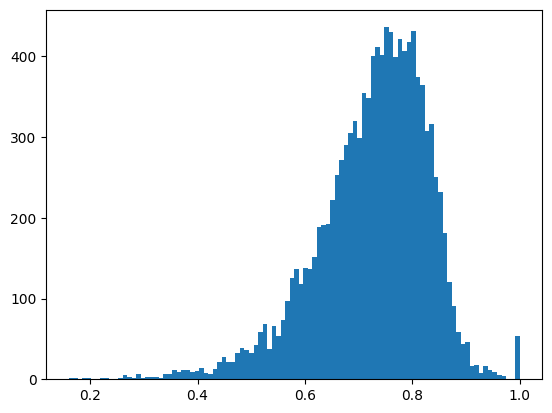

In [11]:
# statistics score using matplotlib
import matplotlib.pyplot as plt
plt.hist(df['score'], bins=100)
plt.show()

In [12]:
# remove lines that LaBSE score is less than 0.6 or more than 0.99
df = df[df['score'] >= 0.6]
df = df[df['score'] <= 0.99]
df

,en,ja,zh,en_len,ja_len,zh_len,score
0,The long-wandering eccentric no longer thinks ...,長年放浪してきた傾奇者は、もうそのことを思い出さないだろう。,流浪多年的倾奇者已不会再想起它，,17,16,13,0.757267
1,"But when he closes his eyes, he can still see ...",しかし目を閉じると、たたら砂の月夜や炉火が見える。,但闭上双眼，却仍能看到踏鞴砂的月夜与炉火。,31,16,21,0.778838
2,The kind young deputy said:,若く、心優しい副官が言った。,年轻仁厚的副官说：,7,11,8,0.814170
3,"""This gold ornament is a proof of identity gra...",「この金の飾りは、将軍から授かった身分の証である。」,「这金饰是将军大人所赐身份之证，」,22,16,14,0.819174
4,"""But as you travel the world, please bear this...",「世を渡り歩く時、やむを得ない場合を除き、」,「但你行走世间时，若非万不得已，」,14,15,16,0.709527
...,...,...,...,...,...,...,...
12642,"Sangonomiya was once an ocean abyss, until the...",珊瑚宮は、最初は海溝だった。大蛇が渡来した際、渦が巻き上がった珊瑚が島になった。故に珊瑚宮の...,珊瑚宫者，初为海渊，后有大蛇渡来，盘桓而升涡流，塑珊瑚而成岛。是故珊瑚宫人名之「海祇岛」，盖...,79,54,54,0.801211
12643,The inhabitants of Watatsumi call themselves t...,海祇の人は海民と自称し、大蛇オロバシノミコトを祀る。海祇島に将軍奉行の位がなく、神宮を最高権...,海祇之人自称海民，奉大蛇远吕羽氏尊。海祇岛以神宫为高府，无将军奉行之畴。大小事务仰赖诸巫女，...,107,68,65,0.803473
12644,"During the Archon War, Her Excellency the Almi...",往年魔神の混戦中、雷電大御所将軍様が稲妻全土を平定した。皆ひれ伏し、各々の地を治めた。事を起...,往年魔神混战，雷电大御所将军殿下定稻妻全土于一元，众皆震悚俯首，各安其位，或有直遭殄灭，再无...,149,91,87,0.700754
12645,"The war was brutal, and brought great sufferin...",過酷な戦で民が苦しんだ。今のヤシオリ島で激しい戦闘が行われ、双方の被害が甚大だった。大御所殿...,战事酷烈，民生惨苦。两方鏖战今八酝岛，皆多有伤亡，大御所殿下之爱将天狗笹百合亦陨落其间。大蛇...,102,62,61,0.824992


In [13]:
# replace「」to “”, 『』to ‘’ in zh
df['zh'] = df['zh'].apply(lambda x: x.replace('「', '“'))
df['zh'] = df['zh'].apply(lambda x: x.replace('」', '”'))
df['zh'] = df['zh'].apply(lambda x: x.replace('『', '‘'))
df['zh'] = df['zh'].apply(lambda x: x.replace('』', '’'))
df

,en,ja,zh,en_len,ja_len,zh_len,score
0,The long-wandering eccentric no longer thinks ...,長年放浪してきた傾奇者は、もうそのことを思い出さないだろう。,流浪多年的倾奇者已不会再想起它，,17,16,13,0.757267
1,"But when he closes his eyes, he can still see ...",しかし目を閉じると、たたら砂の月夜や炉火が見える。,但闭上双眼，却仍能看到踏鞴砂的月夜与炉火。,31,16,21,0.778838
2,The kind young deputy said:,若く、心優しい副官が言った。,年轻仁厚的副官说：,7,11,8,0.814170
3,"""This gold ornament is a proof of identity gra...",「この金の飾りは、将軍から授かった身分の証である。」,“这金饰是将军大人所赐身份之证，”,22,16,14,0.819174
4,"""But as you travel the world, please bear this...",「世を渡り歩く時、やむを得ない場合を除き、」,“但你行走世间时，若非万不得已，”,14,15,16,0.709527
...,...,...,...,...,...,...,...
12642,"Sangonomiya was once an ocean abyss, until the...",珊瑚宮は、最初は海溝だった。大蛇が渡来した際、渦が巻き上がった珊瑚が島になった。故に珊瑚宮の...,珊瑚宫者，初为海渊，后有大蛇渡来，盘桓而升涡流，塑珊瑚而成岛。是故珊瑚宫人名之“海祇岛”，盖...,79,54,54,0.801211
12643,The inhabitants of Watatsumi call themselves t...,海祇の人は海民と自称し、大蛇オロバシノミコトを祀る。海祇島に将軍奉行の位がなく、神宮を最高権...,海祇之人自称海民，奉大蛇远吕羽氏尊。海祇岛以神宫为高府，无将军奉行之畴。大小事务仰赖诸巫女，...,107,68,65,0.803473
12644,"During the Archon War, Her Excellency the Almi...",往年魔神の混戦中、雷電大御所将軍様が稲妻全土を平定した。皆ひれ伏し、各々の地を治めた。事を起...,往年魔神混战，雷电大御所将军殿下定稻妻全土于一元，众皆震悚俯首，各安其位，或有直遭殄灭，再无...,149,91,87,0.700754
12645,"The war was brutal, and brought great sufferin...",過酷な戦で民が苦しんだ。今のヤシオリ島で激しい戦闘が行われ、双方の被害が甚大だった。大御所殿...,战事酷烈，民生惨苦。两方鏖战今八酝岛，皆多有伤亡，大御所殿下之爱将天狗笹百合亦陨落其间。大蛇...,102,62,61,0.824992


In [14]:
# drop len and score column
df = df.drop(columns=['en_len', 'ja_len', 'zh_len', 'score'])
# save to parquet
df.to_parquet('parquet/GenshinReadable.parquet', index=False)

In [15]:
# load parquet
df = pd.read_parquet('parquet/GenshinReadable.parquet')
df

,en,ja,zh
0,The long-wandering eccentric no longer thinks ...,長年放浪してきた傾奇者は、もうそのことを思い出さないだろう。,流浪多年的倾奇者已不会再想起它，
1,"But when he closes his eyes, he can still see ...",しかし目を閉じると、たたら砂の月夜や炉火が見える。,但闭上双眼，却仍能看到踏鞴砂的月夜与炉火。
2,The kind young deputy said:,若く、心優しい副官が言った。,年轻仁厚的副官说：
3,"""This gold ornament is a proof of identity gra...",「この金の飾りは、将軍から授かった身分の証である。」,“这金饰是将军大人所赐身份之证，”
4,"""But as you travel the world, please bear this...",「世を渡り歩く時、やむを得ない場合を除き、」,“但你行走世间时，若非万不得已，”
...,...,...,...
10234,"Sangonomiya was once an ocean abyss, until the...",珊瑚宮は、最初は海溝だった。大蛇が渡来した際、渦が巻き上がった珊瑚が島になった。故に珊瑚宮の...,珊瑚宫者，初为海渊，后有大蛇渡来，盘桓而升涡流，塑珊瑚而成岛。是故珊瑚宫人名之“海祇岛”，盖...
10235,The inhabitants of Watatsumi call themselves t...,海祇の人は海民と自称し、大蛇オロバシノミコトを祀る。海祇島に将軍奉行の位がなく、神宮を最高権...,海祇之人自称海民，奉大蛇远吕羽氏尊。海祇岛以神宫为高府，无将军奉行之畴。大小事务仰赖诸巫女，...
10236,"During the Archon War, Her Excellency the Almi...",往年魔神の混戦中、雷電大御所将軍様が稲妻全土を平定した。皆ひれ伏し、各々の地を治めた。事を起...,往年魔神混战，雷电大御所将军殿下定稻妻全土于一元，众皆震悚俯首，各安其位，或有直遭殄灭，再无...
10237,"The war was brutal, and brought great sufferin...",過酷な戦で民が苦しんだ。今のヤシオリ島で激しい戦闘が行われ、双方の被害が甚大だった。大御所殿...,战事酷烈，民生惨苦。两方鏖战今八酝岛，皆多有伤亡，大御所殿下之爱将天狗笹百合亦陨落其间。大蛇...
